## Black Friday Dataset

It's a regression problem. Building model to predict Purchase amount based on the different features.

In [73]:
import pandas as pd
data = pd.read_csv("train.csv")
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [74]:
data.shape

(550068, 12)

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [76]:
## We do have NULL and Object type datatype records in the dataset.
## My focus would be to remove them first.
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [77]:
## Handling NULL values in Product_Category_3  and Product_Category_2 column
data['Product_Category_3'].fillna(data['Product_Category_3'].value_counts().index[0], inplace=True)
data['Product_Category_2'].fillna(data['Product_Category_2'].value_counts().index[0], inplace=True)

In [78]:
# Let's have a look on the NULL columsn again
data.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [79]:
## Identifying target 
X = data.drop('Purchase', axis=1)
y = data['Purchase']


In [80]:
from sklearn.preprocessing import LabelEncoder

lblEncoder = LabelEncoder()
X = X.apply(lblEncoder.fit_transform)

In [81]:
X.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0,672,0,0,10,0,2,0,2,6,12
1,0,2376,0,0,10,0,2,0,0,4,10
2,0,852,0,0,10,0,2,0,11,6,12
3,0,828,0,0,10,0,2,0,11,12,12
4,1,2734,1,6,16,2,4,0,7,6,12


In [82]:
# Now, let's convert dtype to int64
X = X.apply(lambda x: x.astype(int))
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
User_ID                       550068 non-null int32
Product_ID                    550068 non-null int32
Gender                        550068 non-null int32
Age                           550068 non-null int32
Occupation                    550068 non-null int32
City_Category                 550068 non-null int32
Stay_In_Current_City_Years    550068 non-null int32
Marital_Status                550068 non-null int32
Product_Category_1            550068 non-null int32
Product_Category_2            550068 non-null int32
Product_Category_3            550068 non-null int32
dtypes: int32(11)
memory usage: 23.1 MB


In [83]:
from sklearn.preprocessing import StandardScaler

sdScalr = StandardScaler()
X = sdScalr.fit_transform(X)

In [84]:
X

array([[-1.74966103, -1.02299262, -1.74651251, ..., -0.61080871,
        -0.29360542,  0.37398522],
       [-1.74966103,  0.66046883, -1.74651251, ..., -1.11891197,
        -0.75936196, -0.39972114],
       [-1.74966103, -0.84516218, -1.74651251, ...,  1.67565594,
        -0.29360542,  0.37398522],
       ...,
       [ 1.74267352,  1.83810149, -1.74651251, ...,  3.70806897,
        -0.29360542,  0.37398522],
       [ 1.74386018,  1.83810149, -1.74651251, ...,  3.70806897,
        -0.29360542,  0.37398522],
       [ 1.74445351,  1.8361256 , -1.74651251, ...,  3.70806897,
        -0.29360542,  0.37398522]])

In [85]:
from sklearn.decomposition import PCA

pca = PCA().fit(X)

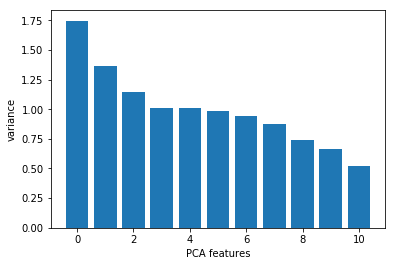

In [86]:
%matplotlib inline
import matplotlib.pyplot as plt

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA features')
plt.ylabel('variance')
plt.show()

In [87]:
## it seems most of the features are contributing in the variance

In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## DecisionTreeRegressor

In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor(random_state=0)

param_grid ={'max_depth' : range(1,10)}

dtree_cv = GridSearchCV(dtree, param_grid, cv=3)
dtree_cv.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 10)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [90]:
y_pred = dtree_cv.predict(X_test)

In [95]:
print("The best param of Decision Tree Regressor:{}".format(dtree_cv.best_params_))
print("The score of Decision Tree Regressor:{}".format(dtree_cv.best_score_))

The best param of Decision Tree Regressor:{'max_depth': 9}
The score of Decision Tree Regressor:0.6720113434319108


In [101]:
print("DecisionTreeRegressor score:{}".format(dtree_cv.score(X_train, y_train)))
print("Mean absolute error:{}".format(mean_absolute_error(y_pred, y_test)))
print("Mean absolute error:{}".format(mean_squared_error(y_pred, y_test)))

DecisionTreeRegressor score:0.678049421275415
Mean absolute error:2148.1975752359717
Mean absolute error:8198247.189680472


## RandomForestRegressor

In [106]:
from sklearn.ensemble import RandomForestRegressor

rtree = RandomForestRegressor(random_state=0)

param_grid ={'max_depth' : range(1,10)}

rtree_cv = GridSearchCV(rtree, param_grid, cv=3)
rtree_cv.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 10)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [107]:
y_pred = rtree_cv.predict(X_test)

In [108]:
print("The best param of RandomForestRegressor:{}".format(rtree_cv.best_params_))
print("The score of RandomForestRegressor:{}".format(rtree_cv.best_score_))

The best param of RandomForestRegressor:{'max_depth': 9}
The score of RandomForestRegressor:0.6784062613288369


In [109]:
print("RandomForestRegressor score:{}".format(rtree_cv.score(X_train, y_train)))
print("Mean absolute error:{}".format(mean_absolute_error(y_pred, y_test)))
print("Mean absolute error:{}".format(mean_squared_error(y_pred, y_test)))

RandomForestRegressor score:0.6834709115467156
Mean absolute error:2135.9440022846397
Mean absolute error:8053293.520717979
